In [200]:
#pip3 install opencv-python
# DATASET DOWNLOADED BELOW
# https://www.kaggle.com/datasets/alxmamaev/flowers-recognition?resource=download 

In [201]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import glob
import PIL
import tensorflow as tf
import random as rn
import pathlib

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from tensorflow import keras

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


# Nicholas Wilcox
# final

In [202]:
# get the path/directory for DAISIES
daisyDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/daisy"
for images in os.listdir(daisyDir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

14167534527_781ceb1b7a_n.jpg
34718882165_68cdc9def9_n.jpg
5512287917_9f5d3f0f98_n.jpg
476857510_d2b30175de_n.jpg
521762040_f26f2e08dd.jpg
33837577463_1ae52a3726_n.jpg
34638378196_216d5bbc2e_n.jpg
7320089276_87b544e341.jpg
8008258043_5457dd254b_n.jpg
721595842_bacd80a6ac.jpg
8719756744_34a5a83976_n.jpg
5110107234_12ddc0206b_m.jpg
20773528301_008fcbc5a1_n.jpg
144076848_57e1d662e3_m.jpg
510844526_858b8fe4db.jpg
5632774792_0fa33d17eb_n.jpg
12891819633_e4c82b51e8.jpg
7630517248_98fb8bee1f_n.jpg
3706420943_66f3214862_n.jpg
20289938802_e16fa9f23d.jpg
11023214096_b5b39fab08.jpg
3474942718_c418dae6f1.jpg
3084924076_4d5c5711af_m.jpg
34542837641_10492bf600_n.jpg
33843400403_db00aa16b8_n.jpg
14471433500_cdaa22e3ea_m.jpg
3711723108_65247a3170.jpg
705422469_ffa28c566d.jpg
6323721068_3d3394af6d_n.jpg
10559679065_50d2b16f6d.jpg
4318007511_e9f4311936_n.jpg
520752848_4b87fb91a4.jpg
147068564_32bb4350cc.jpg
6148728633_27afc47b0c_m.jpg
5135131051_102d4878ca_n.jpg
6046940312_8faf552f3e_n.jpg
14523675369_97

In [203]:
# get the path/directory for DAND
dandDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/dandelion"
for images in os.listdir(dandDir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

9965757055_ff01b5ee6f_n.jpg
461632542_0387557eff.jpg
4572738670_4787a11058_n.jpg
486234138_688e01aa9b_n.jpg
5886830036_2b99899c95.jpg
2600382379_5791b0b35a_m.jpg
5605093210_5fecb71c61.jpg
18889216716_cd67aec890_n.jpg
2674176237_e265ea64cc_n.jpg
6146107825_45f708ecd7_n.jpg
4669815582_0a994fb4fd_m.jpg
8475769_3dea463364_m.jpg
4571923094_b9cefa9438_n.jpg
19621170705_30bf8bf0ba.jpg
5033866477_a77cccba49_m.jpg
151385301_153eacf6b5_n.jpg
4510350093_3700064215.jpg
19443674130_08db1d9578_m.jpg
7249354462_21925f7d95_n.jpg
5875763050_82f32f2eed_m.jpg
4573886520_09c984ecd8_m.jpg
4254850910_0610224342_n.jpg
344318990_7be3fb0a7d.jpg
16237158409_01913cf918_n.jpg
61242541_a04395e6bc.jpg
8724252904_db9a5104df_m.jpg
33882910234_dd8f1479e3_n.jpg
7132676187_7a4265b16f_n.jpg
3585220976_5acac92d1c.jpg
5613466853_e476bb080e.jpg
17903104293_9138439e76.jpg
2521811279_1f7fc353bf_n.jpg
7083589767_2859993846_n.jpg
2019520447_48b2354a20_m.jpg
8831808134_315aedb37b.jpg
19812060274_c432f603db.jpg
506659320_6fac4655

In [204]:
# get the path/directory for ROSES
roseDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/rose"
for images in os.listdir(roseDir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

16209331331_343c899d38.jpg
5001848317_b33d17ab7a_n.jpg
18302701228_2b5790b199_n.jpg
5777669976_a205f61e5b.jpg
4860145119_b1c3cbaa4e_n.jpg
15011625580_7974c44bce.jpg
17953368844_be3d18cf30_m.jpg
8983268106_dc913d17d8_m.jpg
5001846495_56068de2da_n.jpg
8388497874_1fe750cc95_m.jpg
14267691818_301aceda07.jpg
4558025386_2c47314528.jpg
17990320484_93bba345d2_m.jpg
28131227642_e279b5768b_n.jpg
4608559939_3487bf3b62_n.jpg
18599603859_f2ec616ddf_n.jpg
8723767157_c45bfd3ab6.jpg
8523394349_61b31fdd8f_m.jpg
13279526615_a3b0059bec.jpg
18464052396_6327841e65_n.jpg
3407482427_49d5c75291_m.jpg
5335946155_be70e11cf2_n.jpg
14460517566_783dbf23b8_n.jpg
5001854803_cb87747d4a_n.jpg
15978010566_5fa5905af1_n.jpg
4684127262_6c3346188d.jpg
7316409504_7cf3707f8a_m.jpg
2331651885_619653a5d3.jpg
3697780051_83e50a6dd1_m.jpg
1461381091_aaaa663bbe_n.jpg
18302793940_8fcc8b4661_n.jpg
18486123042_5c8da68f38_n.jpg
5223191368_01aedb6547_n.jpg
2850381271_d2f9a470b1_n.jpg
6936225976_a91b60d8c2_m.jpg
5002462640_5bf92142bf_n.

In [205]:
# get the path/directory for SUNFLOWERS
sunDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/sunflower"
for images in os.listdir(sunDir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

6204049536_1ac4f09232_n.jpg
18828283553_e46504ae38.jpg
8021568040_f891223c44_n.jpg
4942258704_c4146b710a_n.jpg
5979668702_fdaec9e164_n.jpg
11881770944_22b4f2f8f6_n.jpg
8928614683_6c168edcfc.jpg
5963905278_6a8efc6b27_n.jpg
17148843706_df148301ac_n.jpg
14925398301_55a180f919_n.jpg
200557977_bf24d9550b.jpg
14889392928_9742aed45b_m.jpg
6953297_8576bf4ea3.jpg
58636535_bc53ef0a21_m.jpg
15460162172_014bcce403.jpg
5923085671_f81dd1cf6f.jpg
4271193206_666ef60aa0_m.jpg
4160805260_cf758daeae_n.jpg
14741866338_bdc8bfc8d5_n.jpg
5091281256_648c37d7c1_n.jpg
4745991955_6804568ae0_n.jpg
9302733302_2cb92cf275.jpg
2307673262_e1e1aefd29.jpg
6141150299_b46a64e4de.jpg
14969295739_c132a08663_n.jpg
3568114325_d6b1363497.jpg
3846717708_ea11383ed8.jpg
1044296388_912143e1d4.jpg
2588234269_c4bfd0d8b9_n.jpg
1880606744_23e3dc4f6b_n.jpg
7603036176_9e8967cd21.jpg
23645265812_24352ff6bf.jpg
9564240106_0577e919da_n.jpg
4895721788_f10208ab77_n.jpg
3883895985_bd20198371.jpg
9655029591_7a77f87500.jpg
14741812319_e1d32ffb8

In [206]:
# get the path/directory for TULIPS
tulipDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/tulip"
for images in os.listdir(tulipDir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

5700466891_2bcb17fa68_n.jpg
14087792403_f34f37ba3b_m.jpg
3446285408_4be9c0fded_m.jpg
16282277874_b92776b194.jpg
8748266132_5298a91dcf_n.jpg
2418823693_72eec80f42_n.jpg
16303377824_6e9128b4bd.jpg
5543457754_89c44c88de_n.jpg
9870557734_88eb3b9e3b_n.jpg
4604238410_bcec9da4a0_n.jpg
5717951743_365f3f64b9_n.jpg
8713397694_bcbcbba2c2_n.jpg
9444202147_405290415b_n.jpg
7481215720_73e40f178f_n.jpg
25429501953_a1f9ce09e6_n.jpg
518256494_368a72db37.jpg
3002863623_cd83d6e634.jpg
25759191500_1c0da35828_n.jpg
4955884820_7e4ce4d7e5_m.jpg
8713387500_6a9138b41b_n.jpg
7166567320_0a2beb6d42_n.jpg
16568321388_fd07bac92a_n.jpg
4590702749_e1df8e0c1b.jpg
14055574740_bb6a11e983_n.jpg
7166560822_27b1d1d132_n.jpg
251811158_75fa3034ff.jpg
8712268519_f4c2c39a06_n.jpg
2447151631_7551e6377b_n.jpg
13926327692_a07357ff0d.jpg
17733480801_bffa0a30c0_n.jpg
17781940352_a45e4289a5.jpg
14116826873_d4bab623bf_n.jpg
6038098425_b3b4fb62cc_m.jpg
8762189906_8223cef62f.jpg
14068378204_7b26baa30d_n.jpg
7205145492_baec4dbb94.jpg
62

In [207]:
# flower categories:
# daisy
# dandelion
# rose
# sunflower
# tulip


In [208]:
import os
print(os.listdir('/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers'))
# ignore .DS_Store

['.DS_Store', 'daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


In [209]:
x = []
z = []
x_imageSize = 100
y_imageSize = 100
#daisyDir = '/Users/nicholaswilcox/Downloads/myFlowers/daisy'
#roseDir = '/Users/nicholaswilcox/Downloads/myFlowers/rose'
#tulipDir = '/Users/nicholaswilcox/Downloads/myFlowers/tulip'
#dandDir = '/Users/nicholaswilcox/Downloads/myFlowers/dandelion'
#sunDir = '/Users/nicholaswilcox/Downloads/myFlowers/sunflower'

In [210]:
daisy_size = len(daisyDir)
# print(daisy_size) -- 47
rose_size = len(roseDir)
# print(rose_size) -- 46
tulip_size = len(tulipDir)
# print(tulip_size) -- 47
dand_size = len(dandDir)
# print(dand_size) -- 52
sun_size = len(sunDir)
# print(sun_size) -- 51


In [211]:
# CREATE FUNCTION OF TRAINING

In [212]:
def assignLabel(img, flowerType):
    return flowerType

In [213]:
def trainDataFunction (flowerType, dir):
    os.getcwd()
    for img in tqdm(os.listdir(dir)):
        label = assignLabel(img, flowerType)
        path = os.path.join(dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (x_imageSize, y_imageSize))

        x.append(np.array(img))
        z.append(str(label))

In [214]:
#TRAIN DAISY
trainDataFunction('daisy', daisyDir)
print(len(x))

100%|██████████| 764/764 [00:02<00:00, 345.61it/s]

764


In [215]:
#TRAIN ROSE
trainDataFunction('rose', roseDir)
print(len(x))

100%|██████████| 784/784 [00:02<00:00, 341.52it/s]

1548


In [216]:
#TRAIN TULIP
trainDataFunction('tulip', tulipDir)
print(len(x))

100%|██████████| 984/984 [00:03<00:00, 307.34it/s]

2532


In [217]:
#TRAIN dandelion
trainDataFunction('dandelion', dandDir)
print(len(x))

100%|██████████| 1052/1052 [00:03<00:00, 321.88it/s]

3584


In [218]:
#TRAIN sunflower
trainDataFunction('sunflower', sunDir)
print(len(x))

100%|██████████| 733/733 [00:02<00:00, 246.41it/s]

4317


In [219]:
# total of 4317 images

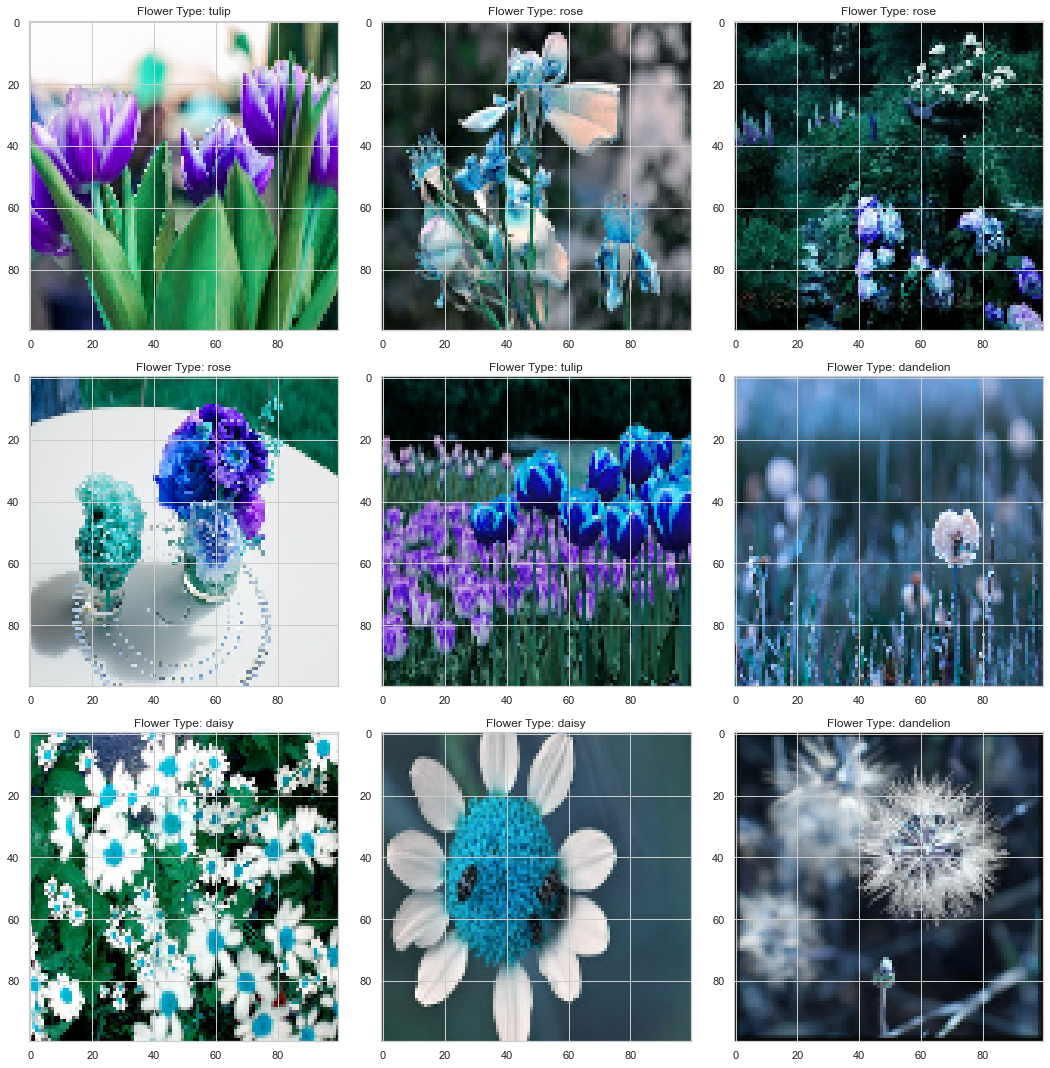

In [220]:
# Print some images

fig, ax = plt.subplots(3, 3)
fig.set_size_inches(15, 15)
for i in range(3):
    for j in range(3):
        index = rn.randint(0, len(z))
        ax[i, j].imshow(x[index])
        ax[i, j].set_title('Flower Type: ' + z[index])
plt.tight_layout()

#im2 = image.copy()
#im2[:, :, 0] = image[:, :, 2]
#im2[:, :, 2] = image[:, :, 0]
#plt.imshow(im2)


In [221]:
# Enable Encoder for Y axis to begin one hot encoding process
# Used to encode target values such as y, noy x which we already have

le = LabelEncoder()
y = le.fit_transform(z)
y = to_categorical(y, 5) # create label for num of classes
x = np.array(x)
x = x/255 # preprocessing


In [222]:
## SPLIT INTO TRAINING SETS
## 80 20 Training Validation

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 81)

In [223]:
# Create the random seeds

np.random.seed(81)
rn.seed(81)
tf.random.set_seed(81)

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
DO NOT RERUN ANYTHING ABOVE UNLESS YOU WANT TO WAIT FOR THE DATA TO TRAIN AGAIN
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

In [224]:
# Creating the CNN

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'same', activation = 'relu', input_shape = (x_imageSize, y_imageSize, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [225]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

In [226]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

In [227]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation = 'softmax'))


In [228]:
#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(5, activation = 'softmax'))

In [229]:
# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

batch_size = 64 
# defines the number of samples to work through
# before updating the internal model parameters
epochs = 100 # start small


In [230]:
from keras.callbacks import ReduceLROnPlateau
# ReduceLROnPLateau = reduce learning rate when a metric has stoped improving
# 
# Arguments
#
# monitor: quantity to be monitored.
# factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
# patience: number of epochs with no improvement after which learning rate will be reduced.
# verbose: int. 0: quiet, 1: update messages.
# mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
# min_delta: threshold for measuring the new optimum, to only focus on significant changes.
# cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
# min_lr: lower bound on the learning rate.

In [231]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.2, patience = 3)

In [232]:
## PREVENT OVERFITTING: 

datagen = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center= False,
    featurewise_std_normalization= False,
    samplewise_std_normalization=False,
    zca_whitening= False,
    rotation_range= 10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False

)
datagen.fit(xTrain)

In [233]:
model.compile(optimizer=Adam(learning_rate=0.01),loss = 'categorical_crossentropy', metrics=['accuracy'])

## Don't need data augmentation, I have enough of a training set. Need to figure out shape...

In [234]:
model.summary()

## Why is the flatten the last step?? Why is are the other layers afterwards not being read??

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 12, 12, 64)      

In [ ]:
History = model.fit_generator(datagen.flow(xTrain, yTrain, batch_size=batch_size), epochs = epochs, steps_per_epoch = xTrain.shape[0] // batch_size, verbose = 1, validation_data =  (xTest, yTest)) #, validation_steps = 1 )
# Input to reshape is a tensor with 1843200 values, but the requested shape requires a multiple of 7776
#	 [[{{node sequential_6/flatten/Reshape}}]] [Op:__inference_train_function_1216]
# Photos are about 320x240 pixels

In [ ]:
## MODEL LOSS GRAPH

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train (80%)', 'Test (20%)'])
plt.show()
